In [1]:
import pandas as pd
events_df=pd.read_csv("events.csv")
print(events_df.head())

   event_ID       user_ID            timestamp platform  event_type  \
0      1004  Hananneh4534  2025-04-10 09:08:12  android        like   
1      1003      Hana3465  2025-05-12 15:13:33      web     comment   
2      1002  Fahimmed5455  2025-04-30 14:15:22      ios      logout   
3      1005     Davod6756  2025-04-19 20:19:23      ios  play_video   
4      1004     Hamid3333  2025-05-12 21:40:33  android        like   

      video_ID  watch_time_sec  video_duration_sec  
0  Zt3Ox7qB8pP           600.0               750.0  
1  Zt3Ox7qB8pP           230.0               300.0  
2  Zt3Ox7qB8pP           200.0               240.0  
3  Zt3Ox7qB8pP           180.0               300.0  
4  b3Tn52qPz7t           240.0               200.0  


In [5]:
events_df=pd.read_csv("events.csv")

engagement_score={
    "login":0,
    "logout":0,
    "play_video":1,
    "like":3,
    "comment":5
}

events_df["engagement_score"]=events_df["event_type"].map(engagement_score)


events_df.to_csv("events.csv",index=False)
events_df


,event_ID,user_ID,timestamp,platform,event_type,video_ID,watch_time_sec,video_duration_sec,engagement_score
0,1004,Hananneh4534,2025-04-10 09:08:12,android,like,Zt3Ox7qB8pP,600.0,750.0,3.0
1,1003,Hana3465,2025-05-12 15:13:33,web,comment,Zt3Ox7qB8pP,230.0,300.0,5.0
2,1002,Fahimmed5455,2025-04-30 14:15:22,ios,logout,Zt3Ox7qB8pP,200.0,240.0,0.0
3,1005,Davod6756,2025-04-19 20:19:23,ios,play_video,Zt3Ox7qB8pP,180.0,300.0,1.0
4,1004,Hamid3333,2025-05-12 21:40:33,android,like,b3Tn52qPz7t,240.0,200.0,3.0
5,1005,Sama4466,2025-05-13 13:12:21,ios,play_video,Zt2Lx7qB8pP,180.0,120.0,1.0
6,1002,Hamed3290,2025-03-29 12:19:22,web,logout,NaN,NaN,NaN,0.0
7,1003,Foroogh9900,2025-04-19 23:12:21,android,comment,a9X4mQw2KOt,120.0,120.0,5.0
8,1001,Yeganeh6745,2025-04-29 21:32:12,web,login,Zt2Lx7qB8pC,45.0,60.0,0.0
9,1002,Shamim3478,2025-05-21 10:33:26,ios,logout,Zt2Lx7qB8pC,200.0,200.0,0.0


In [9]:
df_events=pd.read_csv("events.csv")

grouping=df_events.groupby("platform")["engagement_score"].sum()
grouping

platform
android    14.0
ios         2.0
web        10.0
Name: engagement_score, dtype: float64

In [12]:
df_events=pd.read_csv("events.csv", parse_dates=['timestamp'])

df_events["date"]=df_events["timestamp"].dt.date

pivot_table=df_events.pivot_table(
    index="date",
    columns="platform",
    values="engagement_score",
    aggfunc="sum",
    fill_value=0
)

pivot_table.to_csv("new-events.csv")
pivot_table

platform,android,ios,web
date,,,
2025-03-10,0.0,0.0,0.0
2025-03-11,0.0,0.0,0.0
2025-03-29,0.0,0.0,0.0
2025-04-01,0.0,0.0,0.0
2025-04-10,3.0,0.0,0.0
2025-04-12,0.0,0.0,5.0
2025-04-19,5.0,1.0,0.0
2025-04-29,0.0,0.0,0.0
2025-04-30,0.0,0.0,0.0


C:\Users\asus\AppData\Local\Temp\ipykernel_13572\1216756307.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  heatmap.figure.show()


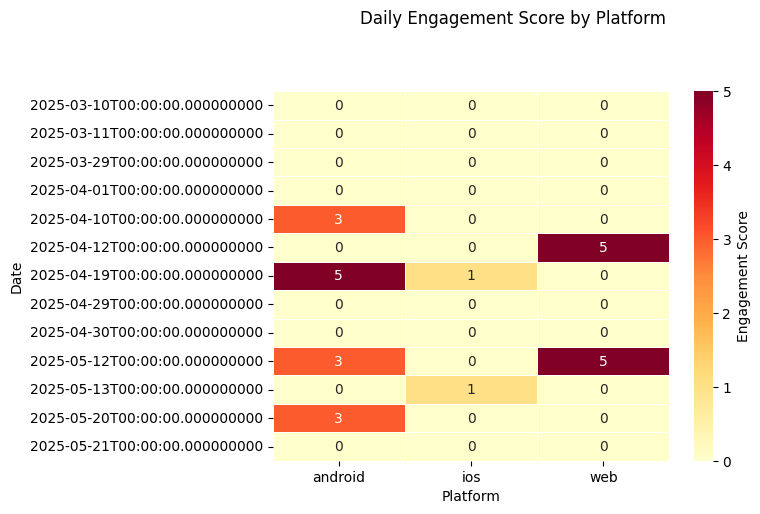

In [ ]:
import pandas as pd
import seaborn as sns


df = pd.read_csv('new-events.csv', parse_dates=['date'])
df.set_index('date', inplace=True)


heatmap = sns.heatmap(
    data=df,
    annot=True,
    fmt=".0f",
    cmap="YlOrRd",
    linewidths=0.5,
    cbar_kws={'label': 'Engagement Score'}
)


heatmap.figure.suptitle('Daily Engagement Score by Platform', y=1.05)
heatmap.set_xlabel('Platform')
heatmap.set_ylabel('Date')


heatmap.figure.savefig('engagement_heatmap.png', dpi=300, bbox_inches='tight')
heatmap.figure.show()
